# Imports:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import chi2

from tqdm import tqdm, trange
import random

import matplotlib.pyplot as plt
import pickle
import statsmodels.api as sm
from scipy.special import expit, logit

# Plot Densities when Scheme is Biased in Y:

In [2]:
fitted_FI_and_corr = pd.read_pickle('sample_by_y_bias.pkl')

In [3]:
fitted_FI_and_corr.describe()

,srs_fi,biased_fi,srs_corr,biased_corr,srs_samp_elasticity,biased_samp_elasticity
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,858.321815,843.741254,-0.000009,-0.077994,0.999792,0.982809
std,138.416246,1.243483,0.003163,0.002797,0.161230,0.001448
min,343.933333,837.872576,-0.013968,-0.089501,0.400621,0.975973
25%,763.300000,842.898717,-0.002127,-0.079873,0.889109,0.981827
50%,855.350000,843.739139,-0.000015,-0.077999,0.996331,0.982806
75%,951.133333,844.575076,0.002093,-0.076109,1.107901,0.983780
max,1492.033333,849.378744,0.013427,-0.065519,1.737954,0.989375


### DDC:

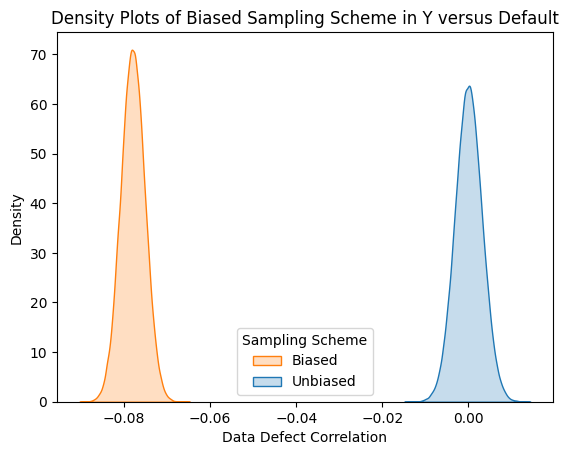

In [4]:
fig = sns.kdeplot(fitted_FI_and_corr[['srs_corr', 'biased_corr']], fill = True)
plt.xlabel('Data Defect Correlation')
plt.ylabel('Density')
plt.legend(title="Sampling Scheme", labels=["Biased", "Unbiased"])
plt.title('Density Plots of Biased Sampling Scheme in Y versus Default')
plt.savefig('ddc_densities_y_bias.png', bbox_inches = 'tight')

### FI:

In [5]:
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Access the blue and orange colors
blue = color_cycle[0]  # 'tab:blue'
orange = color_cycle[1]  # 'tab:orange'

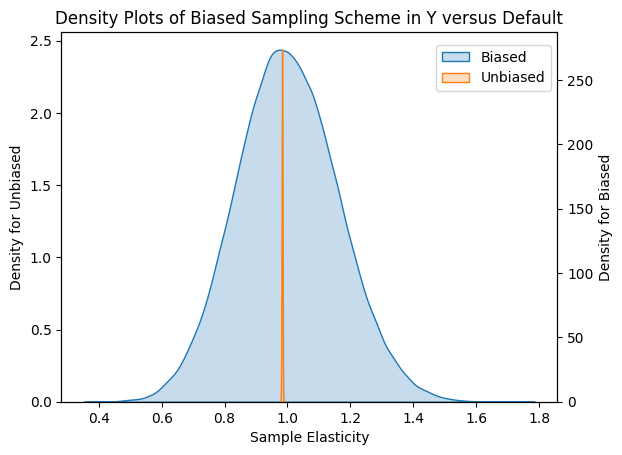

In [6]:
fig, ax1 = plt.subplots()

sns.kdeplot(data=fitted_FI_and_corr['srs_samp_elasticity'], ax=ax1, color=blue, fill=True, label='Unbiased')
ax1.set_ylabel('Density for Unbiased')
ax1.tick_params(axis='y')
ax1.set_xlabel('Sample Elasticity')

ax2 = ax1.twinx()
sns.kdeplot(data=fitted_FI_and_corr['biased_samp_elasticity'], ax=ax2, color=orange, fill=True, label='Biased')
ax2.set_ylabel('Density for Biased')
ax2.tick_params(axis='y')

fig.legend(labels = ['Biased', 'Unbiased'], loc = (0.7, 0.8))

plt.title('Density Plots of Biased Sampling Scheme in Y versus Default')
plt.savefig('samp_elasticity_densities_y_bias.png', bbox_inches = 'tight')

### Joint:

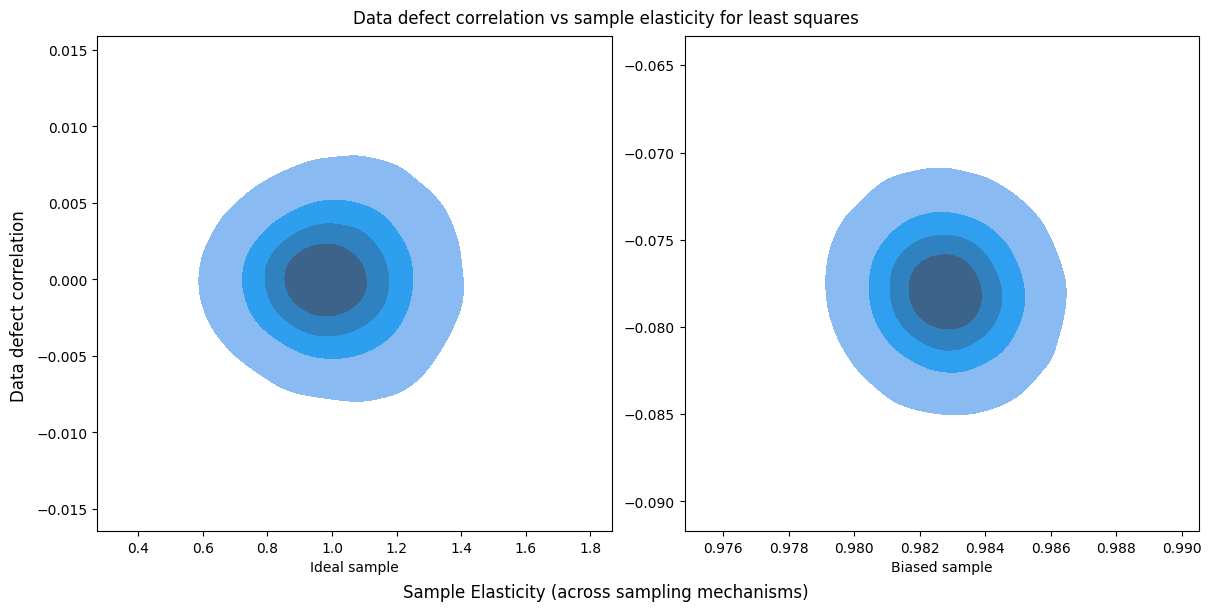

In [7]:
fig, axes = plt.subplots(1, 2, 
                         constrained_layout=True, 
                         figsize=(12, 6))

ax = axes[0]
sns.kdeplot(data = fitted_FI_and_corr, 
            x=f'srs_samp_elasticity',
            y = f'srs_corr', 
            fill=True, 
            bw_adjust=1.8, 
            levels=5,
            ax=ax
           )
ax.set_xlabel('Ideal sample')
ax.set_ylabel('')

ax = axes[1]
sns.kdeplot(data = fitted_FI_and_corr, 
            x=f'biased_samp_elasticity',
            y = f'biased_corr', 
            fill=True, 
            bw_adjust=1.8, 
            levels=5,
            ax=ax
           )
ax.set_xlabel('Biased sample')
ax.set_ylabel('')

fig.suptitle('Data defect correlation vs sample elasticity for least squares')
fig.supylabel('Data defect correlation')
fig.supxlabel('Sample Elasticity (across sampling mechanisms)')
plt.savefig('joint_density_y_bias.png', bbox_inches = 'tight')

# Plot Densities when Scheme is Biased in X:

In [8]:
fitted_FI_and_corr = pd.read_pickle('sample_by_x_bias.pkl')

In [9]:
fitted_FI_and_corr.shape

(100000, 6)

### DDC:

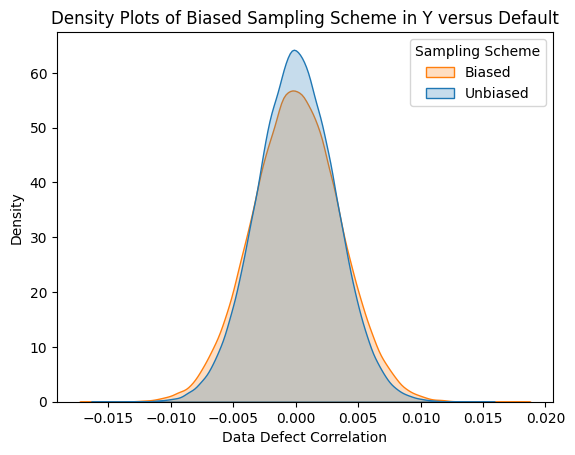

In [10]:
fig = sns.kdeplot(fitted_FI_and_corr[['srs_corr', 'biased_corr']], fill = True)
plt.xlabel('Data Defect Correlation')
plt.ylabel('Density')
plt.legend(title="Sampling Scheme", labels=["Biased", "Unbiased"])
plt.title('Density Plots of Biased Sampling Scheme in Y versus Default')
plt.savefig('ddc_densities_x_bias.png', bbox_inches = 'tight')

### Elasticity:

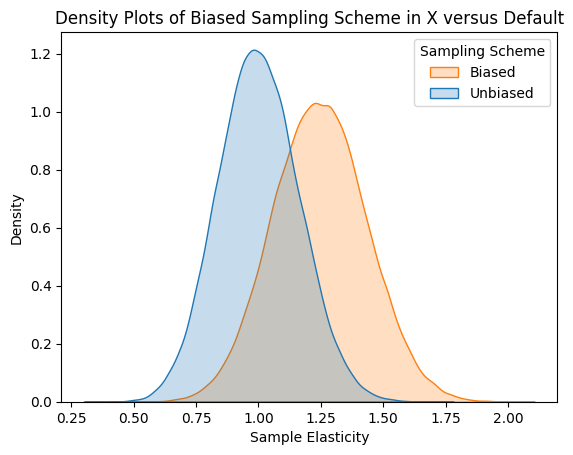

In [11]:
fig = sns.kdeplot(fitted_FI_and_corr[['srs_samp_elasticity', 'biased_samp_elasticity']], fill=True)
plt.xlabel('Sample Elasticity')
plt.ylabel('Density')
plt.legend(title="Sampling Scheme", labels=["Biased", "Unbiased"])
plt.title('Density Plots of Biased Sampling Scheme in X versus Default') 
plt.savefig('samp_elasticity_densities_x_bias.png', bbox_inches = 'tight')

### Joint:

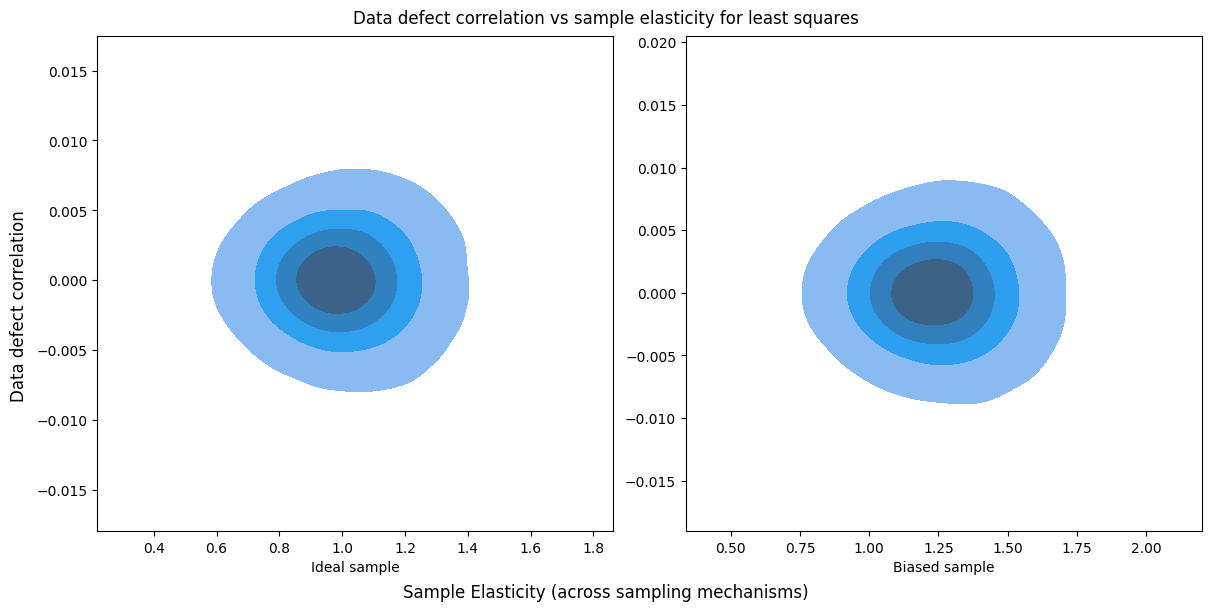

In [12]:
fig, axes = plt.subplots(1, 2, 
                         constrained_layout=True, 
                         figsize=(12, 6))

ax = axes[0]
sns.kdeplot(data = fitted_FI_and_corr, 
            x=f'srs_samp_elasticity',
            y = f'srs_corr', 
            fill=True, 
            bw_adjust=1.8, 
            levels=5,
            ax=ax
           )
ax.set_xlabel('Ideal sample')
ax.set_ylabel('')

ax = axes[1]
sns.kdeplot(data = fitted_FI_and_corr, 
            x=f'biased_samp_elasticity',
            y = f'biased_corr', 
            fill=True, 
            bw_adjust=1.8, 
            levels=5,
            ax=ax
           )
ax.set_xlabel('Biased sample')
ax.set_ylabel('')

fig.suptitle('Data defect correlation vs sample elasticity for least squares')
fig.supylabel('Data defect correlation')
fig.supxlabel('Sample Elasticity (across sampling mechanisms)')
plt.savefig('joint_density_x_bias.png', bbox_inches = 'tight')

# Plot Densities when Scheme is Biased in Abs Y:

In [13]:
fitted_FI_and_corr = pd.read_pickle('sample_by_abs_y_bias.pkl')

### DDC:

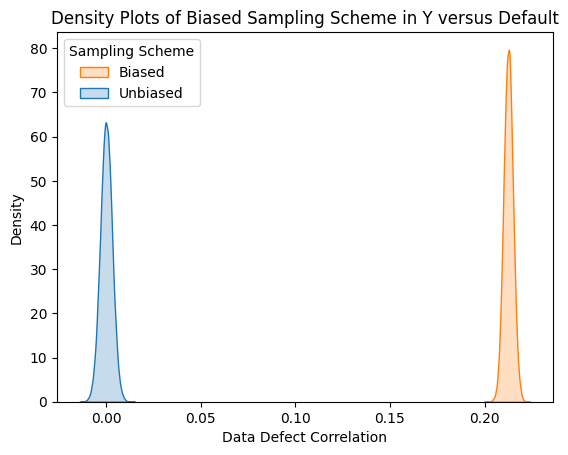

In [14]:
fig = sns.kdeplot(fitted_FI_and_corr[['srs_corr', 'biased_corr']], fill = True)
plt.xlabel('Data Defect Correlation')
plt.ylabel('Density')
plt.legend(title="Sampling Scheme", labels=["Biased", "Unbiased"])
plt.title('Density Plots of Biased Sampling Scheme in Y versus Default')
plt.savefig('ddc_densities_abs_y_bias.png', bbox_inches = 'tight')

### Elasticity:

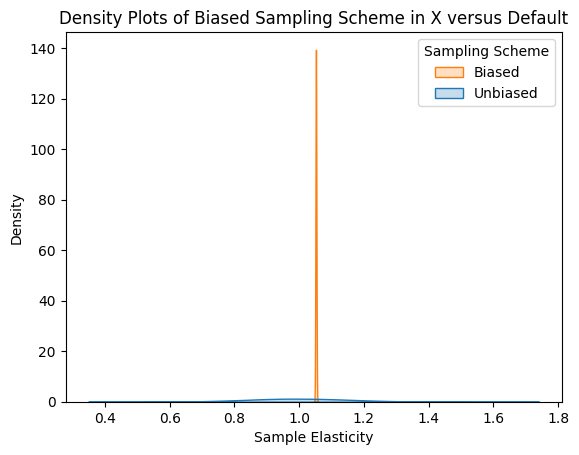

In [15]:
fig = sns.kdeplot(fitted_FI_and_corr[['srs_samp_elasticity', 'biased_samp_elasticity']], fill=True)
plt.xlabel('Sample Elasticity')
plt.ylabel('Density')
plt.legend(title="Sampling Scheme", labels=["Biased", "Unbiased"])
plt.title('Density Plots of Biased Sampling Scheme in X versus Default') 
plt.savefig('samp_elasticity_densities_abs_y_bias.png', bbox_inches = 'tight')

### Joint:

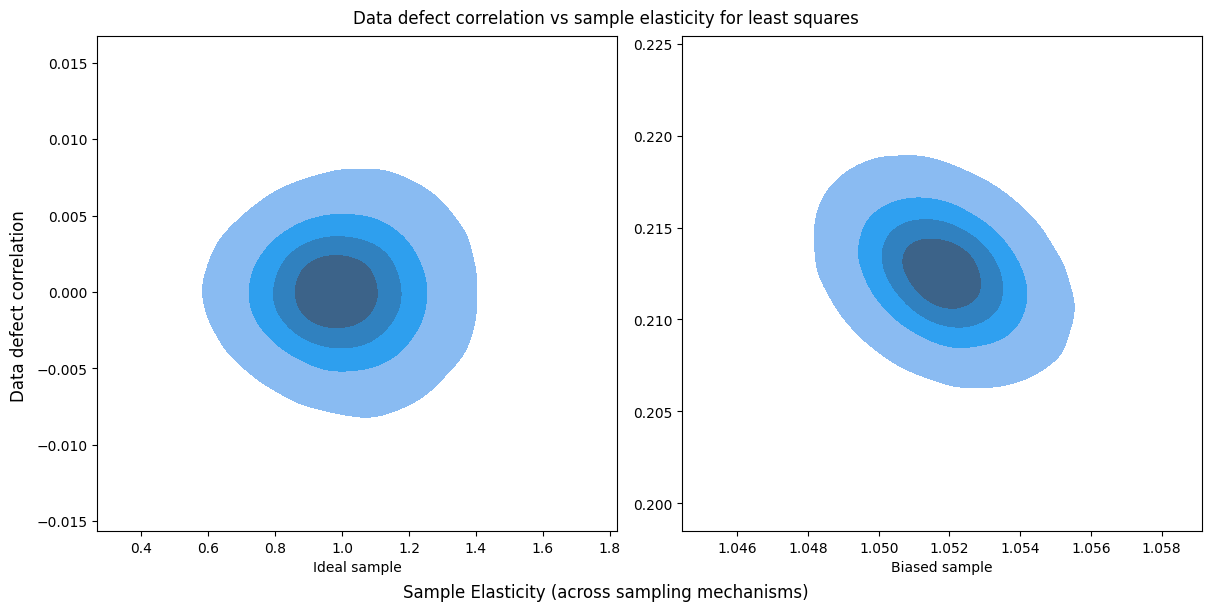

In [16]:
fig, axes = plt.subplots(1, 2, 
                         constrained_layout=True, 
                         figsize=(12, 6))

ax = axes[0]
sns.kdeplot(data = fitted_FI_and_corr, 
            x=f'srs_samp_elasticity',
            y = f'srs_corr', 
            fill=True, 
            bw_adjust=1.8, 
            levels=5,
            ax=ax
           )
ax.set_xlabel('Ideal sample')
ax.set_ylabel('')

ax = axes[1]
sns.kdeplot(data = fitted_FI_and_corr, 
            x=f'biased_samp_elasticity',
            y = f'biased_corr', 
            fill=True, 
            bw_adjust=1.8, 
            levels=5,
            ax=ax
           )
ax.set_xlabel('Biased sample')
ax.set_ylabel('')

fig.suptitle('Data defect correlation vs sample elasticity for least squares')
fig.supylabel('Data defect correlation')
fig.supxlabel('Sample Elasticity (across sampling mechanisms)')
plt.savefig('joint_density_abs_y_bias.png', bbox_inches = 'tight')

# Plot ddc when Scheme is Biased in X + Y: deprecated

In [14]:
fitted_FI_and_corr = pd.read_pickle('sample_by_y_and_x_bias.pkl')

Text(0.5, 1.0, 'Density Plots of Biased Sampling Scheme in X + Y versus Default')

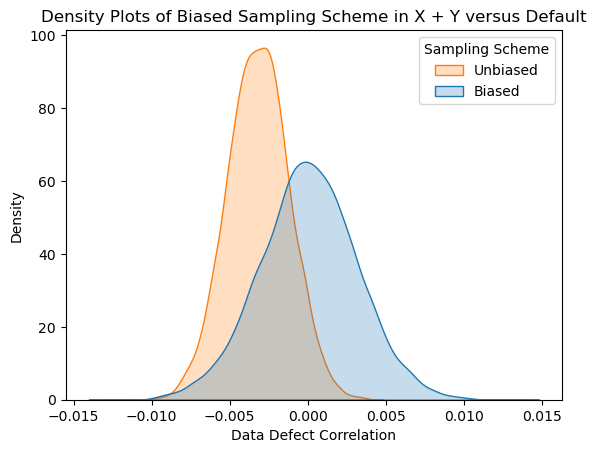

In [17]:
fig = sns.kdeplot(fitted_FI_and_corr[['srs_corr', 'biased_corr']], fill=True)
plt.xlabel('Data Defect Correlation')
plt.ylabel('Density')
plt.legend(title="Sampling Scheme", labels=["Unbiased", "Biased"])
plt.title('Density Plots of Biased Sampling Scheme in X + Y versus Default') 
# plt.savefig('ddc_densities_y_bias.png', bbox_inches = 'tight')

Text(0.5, 1.0, 'Density Plots of Biased Sampling Scheme in X + Y versus Default')

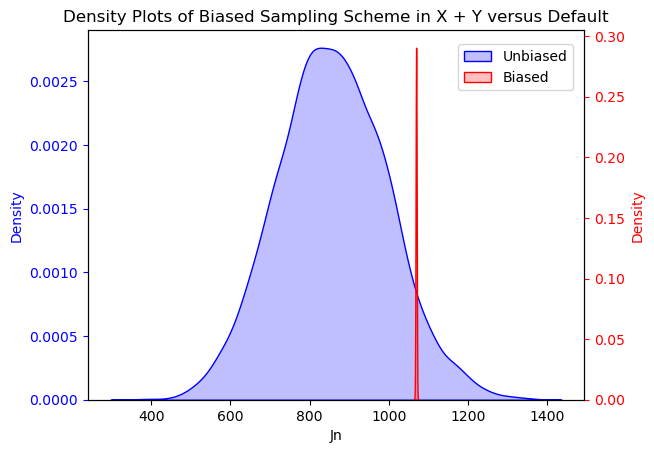

In [52]:
fig, ax1 = plt.subplots()

sns.kdeplot(data=fitted_FI_and_corr['srs_fi'], ax=ax1, color='blue', fill=True, label='Unbiased')
ax1.set_ylabel('Density', color='blue')
ax1.tick_params(axis='y', colors='blue')
ax1.set_xlabel('Jn')

ax2 = ax1.twinx()
sns.kdeplot(data=fitted_FI_and_corr['biased_fi'], ax=ax2, color='red', fill=True, label='Biased')
ax2.set_ylabel('Density', color='red')
ax2.tick_params(axis='y', colors='red')

fig.legend(labels = ['Unbiased', 'Biased'], loc = (0.7, 0.8))

plt.title('Density Plots of Biased Sampling Scheme in X + Y versus Default') 

# plt.savefig('ddc_densities_y_bias.png', bbox_inches = 'tight')

Text(0.5, 0.01, 'Jn (across sampling mechanisms)')

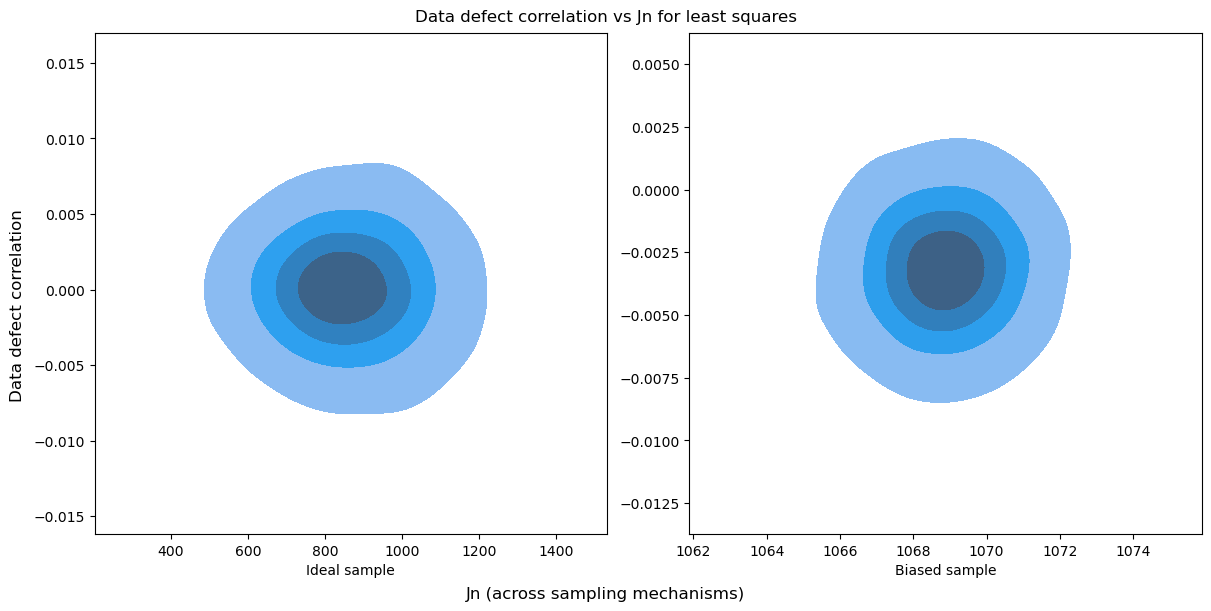

In [53]:
fig, axes = plt.subplots(1, 2, 
                         constrained_layout=True, 
                         figsize=(12, 6))

ax = axes[0]
sns.kdeplot(data = fitted_FI_and_corr, 
            x=f'srs_fi',
            y = f'srs_corr', 
            fill=True, 
            bw_adjust=1.8, 
            levels=5,
            ax=ax
           )
ax.set_xlabel('Ideal sample')
ax.set_ylabel('')

ax = axes[1]
sns.kdeplot(data = fitted_FI_and_corr, 
            x=f'biased_fi',
            y = f'biased_corr', 
            fill=True, 
            bw_adjust=1.8, 
            levels=5,
            ax=ax
           )
ax.set_xlabel('Biased sample')
ax.set_ylabel('')

fig.suptitle('Data defect correlation vs Jn for least squares')
fig.supylabel('Data defect correlation')
fig.supxlabel('Jn (across sampling mechanisms)')

In [72]:
for samp_scheme in ['srs', 'biased']:
    print(sm.OLS(endog = fitted_FI_and_corr[f'{samp_scheme}_corr'], 
           exog = fitted_FI_and_corr[['const', f'{samp_scheme}_fi']]
          ).fit().summary()
    )

                            OLS Regression Results                            
Dep. Variable:               srs_corr   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07071
Date:                Tue, 31 Dec 2024   Prob (F-statistic):              0.790
Time:                        10:35:28   Log-Likelihood:                 43502.
No. Observations:               10000   AIC:                        -8.700e+04
Df Residuals:                    9998   BIC:                        -8.698e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.483e-05      0.000      0.486      0.6

# Run:

In [25]:
fitted_FI_and_corr_normal = pd.read_pickle('overleveraged_points_bais.pkl')
fitted_FI_and_corr_var = pd.read_pickle('variance_function_bias.pkl')

In [26]:
fitted_FI_and_corr = fitted_FI_and_corr_normal.join(fitted_FI_and_corr_var, lsuffix = '_norm', rsuffix = '_var')

In [27]:
fitted_FI_and_corr = fitted_FI_and_corr.iloc[:1000].copy()

<Axes: xlabel='srs_fi_norm', ylabel='srs_corr_norm'>

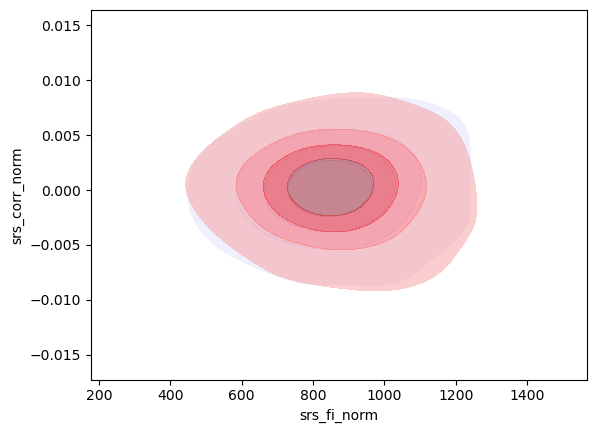

In [28]:
sns.kdeplot(data = fitted_FI_and_corr, 
            x=f'srs_fi_norm',
            y = f'srs_corr_norm', 
            fill=True, 
            bw_adjust=1.8, 
            levels=5,
            color="blue", 
            label="Homoskedastic",
            alpha = 0.2
)

sns.kdeplot(data = fitted_FI_and_corr, 
            x=f'srs_fi_var',
            y = f'srs_corr_var', 
            fill=True, 
            bw_adjust=1.8, 
            levels=5,
            color="red", 
            label="Heteroskedastic",
            alpha = 0.5
           )


In [3]:
fitted_FI_and_corr_var

,srs_fi,biased_fi,srs_corr,biased_corr
0,706.300000,1069.706870,-0.006186,0.001611
1,683.766667,1069.301200,-0.003244,-0.002019
2,797.400000,1068.272182,0.000460,-0.000811
3,800.366667,1068.335264,0.002500,-0.000949
4,532.000000,1067.513695,0.000560,0.000505
...,...,...,...,...
9995,862.200000,1066.036181,0.003208,0.000290
9996,699.533333,1066.468934,0.000298,-0.000362
9997,788.266667,1070.450726,0.002104,-0.001579
9998,871.466667,1070.571387,-0.000508,0.001362
